<a href="https://colab.research.google.com/github/jkchandalia/explore-data/blob/master/Starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
#from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

In [83]:
nltk.download('punkt')
word_tokenize('adsf, asdfjk-wondsf')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['adsf', ',', 'asdfjk-wondsf']

In [77]:
# importing packages
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn packages
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# nltk packages
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
#import unidecode


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/winemag-data_first150k.csv')


In [22]:
print(df.shape)
df.head()
df.columns
df.drop('Unnamed: 0', axis=1, inplace=True)


(150930, 11)


(array([1.5180e+03, 2.6407e+04, 6.9491e+04, 4.1881e+04, 9.8810e+03,
        1.4850e+03, 2.2200e+02, 3.5000e+01, 6.0000e+00, 4.0000e+00]),
 array([ 17. ,  98.2, 179.4, 260.6, 341.8, 423. , 504.2, 585.4, 666.6,
        747.8, 829. ]),
 <BarContainer object of 10 artists>)

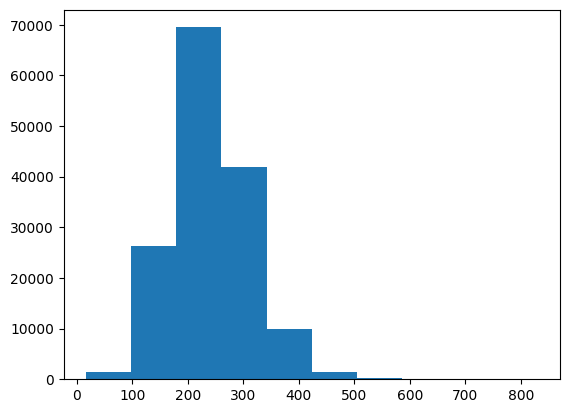

In [23]:
plt.hist(df.description.apply(lambda x: len(x)))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [26]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,variety,winery
count,150925,150930,105195,150930.000000,137235.000000,150925,125870,60953,150930,150930
unique,48,97821,30621,NaN,NaN,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,NaN,NaN,44508,6209,13057,14482,374
mean,NaN,NaN,NaN,87.888418,33.131482,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.222392,36.322536,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,24.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_single = data_sel.drop_duplicates('description')

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Carignan-Syrah                  1
Premsal                         1
Muskat                          1
Syrah-Carignan                  1
Carnelian                       1
Name: variety, Length: 632, dtype: int64

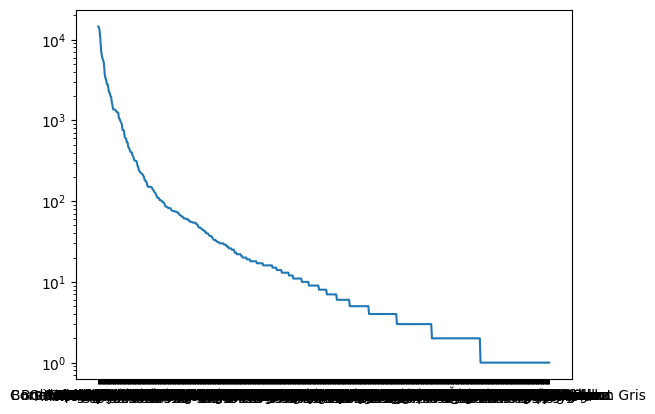

In [93]:
df.variety.value_counts()
plt.plot(df.variety.value_counts())
plt.yscale('log')



In [96]:
df_variety = df.variety.value_counts().reset_index()
varieties = df_variety['index'][df_variety.variety > 10]



In [99]:
varieties = set(varieties)

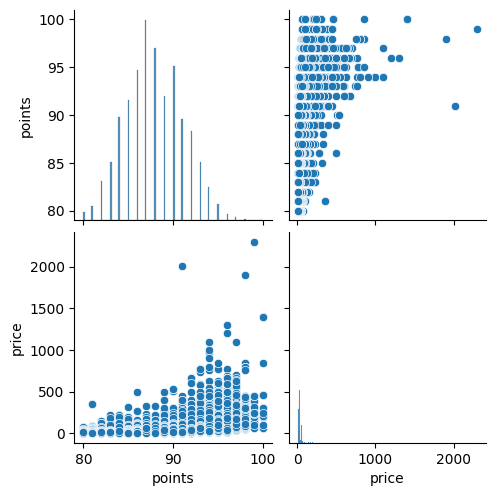

In [30]:
sns.pairplot(df)


In [54]:
! pip install sentence-transformers

from sentence_transformers import SentenceTransformer

#tfe = SentenceTransformer("all-mpnet-base-v2")
tfe = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

df.loc[1,'description']



'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'

In [46]:
df.description.str.lower().values

array(['this tremendous 100% varietal wine hails from oakville and was aged over three years in oak. juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. enjoy 2022–2030.',
       'ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. this is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. a toasty, everlasting finish is heady but ideally balanced. drink through 2023.',
       'mac watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/l of residual sugar.',
       ...,
  

In [49]:
import time
time.time()

1694475629.8892605

In [50]:
df.shape

(150930, 10)

In [58]:
start = time.time()
out = tfe.encode(df.description[0:10000].str.lower().values,
            convert_to_numpy=True,
            convert_to_tensor=False,
        )
stop = time.time()

print(stop-start)

321.08490443229675


In [60]:
out.shape

(10000, 384)

In [63]:
out

array([[ 0.04120538, -0.00711364, -0.01127192, ..., -0.06589606,
         0.01368514, -0.03803741],
       [-0.01992377, -0.04905988,  0.05291271, ..., -0.03401453,
         0.00360597, -0.07687949],
       [ 0.03210258, -0.03788516,  0.02802221, ..., -0.01849909,
         0.11100649, -0.06847285],
       ...,
       [ 0.00612497, -0.03636613,  0.0885151 , ...,  0.0405687 ,
         0.02948226, -0.03869938],
       [-0.00046338, -0.06858759,  0.08570509, ...,  0.05101201,
        -0.00911768, -0.04557192],
       [-0.04600712, -0.06391433,  0.09773407, ...,  0.01721295,
         0.04862536, -0.0252502 ]], dtype=float32)

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(out)


PCA()

In [73]:
pca.transform(out)

df_text = pd.DataFrame(pca.transform(out))


In [74]:
df_text.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.251538,0.077511,0.035259,-0.040337,0.170739,-0.039384,-0.080914,0.080964,0.087587,0.048857,...,-0.001201,-0.003428,-0.003260,-0.000086,0.000418,0.003612,0.000156,-1.208397e-08,-1.172179e-09,8.767994e-09
1,-0.260541,-0.001503,-0.065598,0.050234,0.044278,-0.142825,-0.096799,-0.156212,-0.027285,0.029339,...,-0.003077,-0.001056,-0.003930,-0.001521,0.002624,0.002268,0.005100,-2.579047e-09,4.051839e-09,7.656593e-09
2,0.023799,-0.110958,-0.078123,0.098641,0.041917,-0.053590,-0.096470,0.023477,0.112205,-0.071577,...,0.003432,0.007574,0.012084,-0.007858,-0.002558,-0.002386,0.002358,1.078625e-08,4.083807e-08,-2.048989e-09
3,0.065576,0.182936,0.002141,-0.039973,0.072046,-0.136406,-0.135779,0.148592,0.131265,0.001542,...,0.006381,-0.001648,-0.000189,0.000933,-0.000067,0.000461,-0.001432,1.050098e-09,-2.099046e-08,-1.221057e-09
4,0.427342,0.215226,0.135915,0.141856,0.075829,0.025646,-0.044646,0.110144,0.008645,0.128025,...,0.007082,-0.007638,0.001375,0.003645,0.002479,-0.007269,0.002829,5.923897e-10,-3.097268e-08,7.706692e-09


In [71]:
df_train = df.loc[0:10000,:]

df_train.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [86]:
df_train2 = pd.concat([df_train, df_text.loc[:,:100]], axis=1)

In [89]:
df_train2.columns[0:15]

Index([    'country', 'description', 'designation',      'points',
             'price',    'province',    'region_1',    'region_2',
           'variety',      'winery',             0,             1,
                   2,             3,             4],
      dtype='object')

In [91]:
df_train3 = df_train2.drop(['description', 'designation', 'province', 'region_1', 'region_2', 'winery'], axis=1)

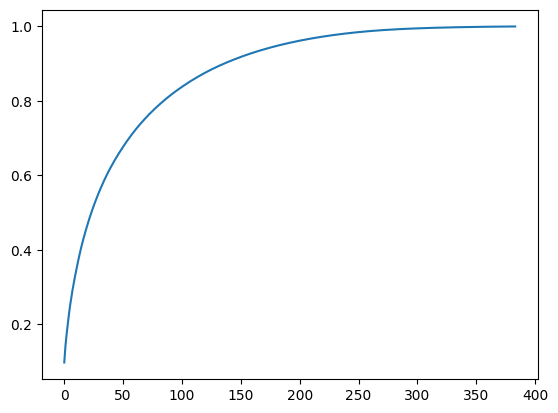

In [67]:
ev = np.cumsum(pca.explained_variance_ratio_)
plt.plot(ev)

In [108]:
df_train4 = df_train3[df_train3.variety.isin(varieties)]
df_train4.shape
varieties = set(df_train4.variety.value_counts().index[df_train4.variety.value_counts()>10])
varieties
df_train5 = df_train4[df_train4.variety.isin(varieties)]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_train5.drop('variety', axis=1), df_train5.variety,
                                                    test_size=0.2, random_state=42, stratify=df_train5.variety)

In [112]:
X_train.shape
y_test

1642           Red Blend
7701        Pinot Grigio
6314           Zinfandel
7696               Syrah
5698          Pinot Noir
              ...       
4767          Chardonnay
4312    Portuguese White
558              Moscato
2136    Portuguese White
9818            Zweigelt
Name: variety, Length: 1865, dtype: object

In [116]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [117]:
le.classes_


array(['Aglianico', 'Albariño', 'Alsace white blend', 'Barbera',
       'Blaufränkisch', 'Bordeaux-style Red Blend',
       'Bordeaux-style White Blend', 'Cabernet Franc',
       'Cabernet Sauvignon', 'Carmenère', 'Carricante', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Falanghina', 'Fiano', 'G-S-M',
       'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Godello',
       'Greco', 'Grenache', 'Grillo', 'Grüner Veltliner', 'Malbec',
       'Malbec-Merlot', 'Mencía', 'Meritage', 'Merlot', 'Monastrell',
       'Moscato', 'Mourvèdre', 'Nebbiolo', 'Nerello Mascalese',
       "Nero d'Avola", 'Petit Verdot', 'Petite Sirah', 'Pinot Bianco',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Provence red blend',
       'Red Blend', 'Rhône-style Red Blend', 'Rhône-style White Blend',
       'Riesling', 'Rosado', 'Rosé', 'Sangiovese', 'Sauvignon',
       'Sauvignon Blanc', 'Shiraz', 'Sparkling Blend', 'Spätburg

In [130]:
X_train.country.astype('category')
X_train=X_train.astype({'country': 'category'})


In [156]:
X_train.country.isna().sum()

1

In [136]:
%%time

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
'''xgbc0 = XGBClassifier(objective='multi:softprob',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False,
                      enable_categorical=True)
'''
xgbc1 = XGBClassifier(enable_categorical=True,
                      tree_method='hist',
                      label_encoder)
xgbc1.fit(X_train , y_train)

CPU times: user 2min 14s, sys: 350 ms, total: 2min 14s
Wall time: 1min 23s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [138]:
#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train)

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


ValueError: ignored

In [139]:
X_test=X_test.astype({'country': 'category'})
test_predictions = clf0.predict(X_test)

In [144]:
test_predictions
sum(y_test == test_predictions)/len(y_test)

0.2552278820375335

In [147]:
xgbc1.score(X_test, y_test)

0.2552278820375335

In [158]:
accs_test = accuracy_score(y_test, test_predictions)
accs_test

0.2552278820375335

In [151]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

dummy_clf.predict(X_test)


array([42,  8, 12, ..., 28, 43, 56])

In [152]:
dummy_clf.score(X_test, y_test)


0.056836461126005364

In [162]:
#creating deepcopy of default parameters before manipulations
#params = deepcopy(default_params)
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

Metrics

In [153]:
def print_stats(preds, target, labels, sep='-', sep_len=40, fig_size=(10,8)):
    print('Accuracy = %.3f' % metrics.accuracy_score(target, preds))
    print(sep*sep_len)
    print('Classification report:')
    print(metrics.classification_report(target, preds))
    print(sep*sep_len)
    print('Confusion matrix')
    cm=metrics.confusion_matrix(target, preds)
    cm = cm / np.sum(cm, axis=1)[:,None]
    sns.set(rc={'figure.figsize':fig_size})
    sns.heatmap(cm,
        xticklabels=labels,
        yticklabels=labels,
           annot=True, cmap = 'YlGnBu')
    plt.pause(0.05)

Accuracy = 0.255
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        16
           4       1.00      0.67      0.80         3
           5       0.54      0.13      0.21       116
           6       0.00      0.00      0.00        16
           7       0.14      0.06      0.08        17
           8       0.18      0.21      0.19       123
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         7
          12       0.32      0.37      0.35       164
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5


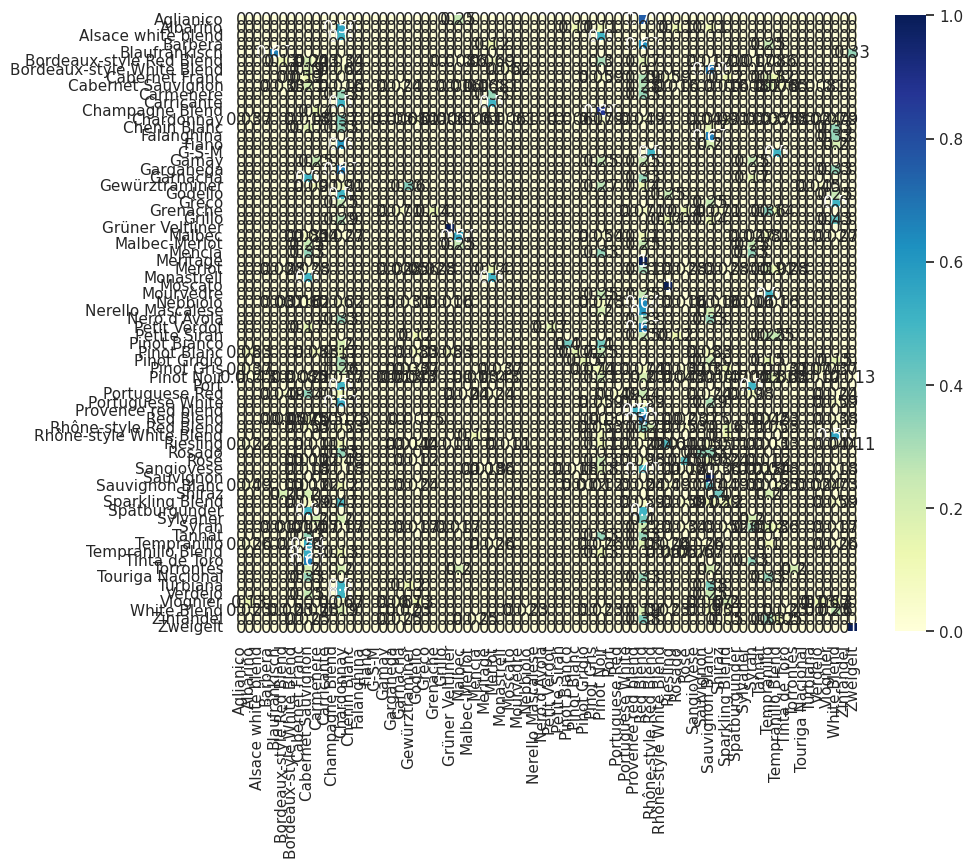

In [154]:
print_stats(test_predictions, y_test, le.classes_, sep='-')
